### 코로나 데이터 분석

### 학습 목표
 * 코로나 데이터와 백신 접종률 데이터를 수집하여 지금까지 내용을 나라별로 분석해 본다.
 * 데이터 분석을 통해 pandas에 대해 좀 더 깊이 알아본다.

### 데이터가 수집된 사이트 
* bloomberg.com
  * https://www.bloomberg.com/graphics/covid-vaccine-tracker-global-distribution/
  
* 코로나 19(COVID-19) 실시간 상황판
  * https://coronaboard.kr/

In [1]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')

### 01 파일 불러오기

In [2]:
os.listdir(os.getcwd())

['.git',
 '.idea',
 '.ipynb_checkpoints',
 '01_dataScraping_corona01_today.ipynb',
 '01_dataScraping_corona02.ipynb',
 '01_dataScraping_corona02.py',
 '02_dataScraping_bloomberg.ipynb',
 '02_dataScraping_bloomberg.py',
 '03_corona_vaccine_merge.ipynb',
 '03_corona_vaccine_merge.py',
 '04_analysis_corr.ipynb',
 '05_people_request.ipynb',
 '06_corona_analysis.ipynb',
 '20210921_00_datamerge.csv',
 '20210921_00_datamerge.xlsx',
 '2021_0911_13',
 '2021_0911_13.zip',
 '2021_0920_00',
 'chromedriver_91.exe',
 'data',
 'html_pdf',
 'project01_01',
 'README.md',
 'WEB_sel_project11_naverNews_corona_0731.ipynb']

In [20]:
import pandas as pd

corona = pd.read_csv("./data/20210929_01_datamerge.csv")
corona.shape

(178, 21)

### Learn 01. 보이지 않는 전체 내용을 표시해 보기

In [21]:
print( pd.options.display.max_rows )    
print( pd.options.display.max_columns )

500
500


In [22]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500 

In [23]:
corona.head()

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종가능률(인구),발생률_순위,접종률_순위,확진자비율(인구),1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,132772,331002651,43942335,390114340.0,60.9,13.0,47.5,0.132755,64.3,55.3,21819\n-275,1.6,76.0,187382.0,709119,2781.0,33394833.0,208564.0,716762.0
1,인도,India,24431,1380004385,33714241,870566900.0,31.8,103.0,95.0,0.024431,46.2,16.4,8944,1.3,97.8,21093.0,447699,337.0,32976760.0,28144.0,7488509.0
2,브라질,Brazil,100520,212559417,21366395,232250880.0,56.3,29.0,61.5,0.100520,71.1,41.4,8318,2.8,95.3,14423.0,594702,218.0,20361191.0,20818.0,3757702.0
3,영국,U.K.,113959,67886011,7701715,93500856.0,70.0,20.0,26.0,0.113451,73.0,67.0,878\n-38,1.8,80.7,37485.0,136208,40.0,6219111.0,33541.0,63103.0
4,러시아,Russia,51151,145934462,7464708,89682024.0,30.6,77.0,99.5,0.051151,32.4,28.4,2300,2.8,88.9,21559.0,205531,852.0,6635485.0,17368.0,220487.0


In [24]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국가명        178 non-null    object 
 1   eng_code   178 non-null    object 
 2   발생률        178 non-null    int64  
 3   인구수        178 non-null    int64  
 4   확진자_합계     178 non-null    int64  
 5   백신접종       178 non-null    float64
 6   접종가능률(인구)  178 non-null    float64
 7   발생률_순위     178 non-null    float64
 8   접종률_순위     178 non-null    float64
 9   확진자비율(인구)  178 non-null    float64
 10  1차접종       178 non-null    float64
 11  2차접종       178 non-null    float64
 12  위중증        131 non-null    object 
 13  치명(%)      178 non-null    object 
 14  완치(%)      175 non-null    float64
 15  확진자1일      151 non-null    float64
 16  사망자합계      178 non-null    int64  
 17  사망자1일      121 non-null    float64
 18  완치합계       175 non-null    float64
 19  완치1일       133 non-null    float64
 20  접종비율(일간)  

### 가설 : 백신 접종은 코로나 감염에 효과가 있다.

### 접종률(인구)와 발생률의 관계

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import platform

### 한글 표시하기

In [26]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [27]:
corona.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '접종가능률(인구)',
       '발생률_순위', '접종률_순위', '확진자비율(인구)', '1차접종', '2차접종', '위중증', '치명(%)',
       '완치(%)', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)'],
      dtype='object')

<AxesSubplot:xlabel='발생률', ylabel='2차접종'>

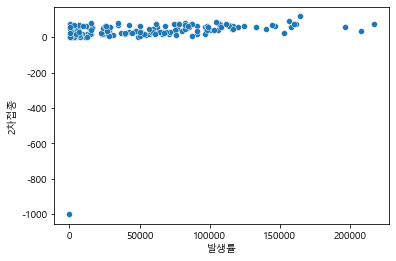

In [28]:
sns.scatterplot(x='발생률', y='2차접종', data=corona)

### 이상치 제거

In [29]:
corona = corona[corona['2차접종'] > 0]

<AxesSubplot:xlabel='발생률', ylabel='2차접종'>

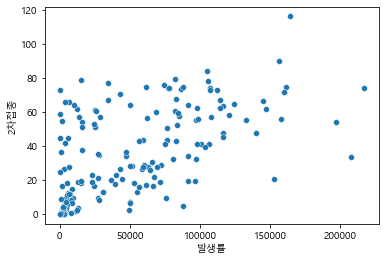

In [30]:
sns.scatterplot(x='발생률', y='2차접종', data=corona)

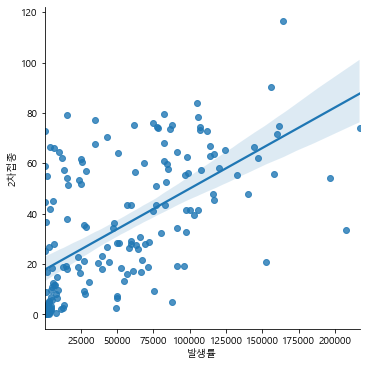

In [31]:
sns.lmplot(x='발생률', y='2차접종', data=corona)

In [33]:
corona[['발생률', '2차접종']].corr()

,발생률,2차접종
발생률,1.000000,0.596321
2차접종,0.596321,1.000000


### 확인 결과 나라별 백신 접종률과 인구당 확진자 비율은 0.582의 양의 상관관계를 갖는다.
 * 백신을 접종하면 할수록 인구당 확진자 비율은 양의 관계로 늘어난다.

### 백신 발생률과 사망률(인구당)은 어떠한가?

In [34]:
corona.head()

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종가능률(인구),발생률_순위,접종률_순위,확진자비율(인구),1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,132772,331002651,43942335,390114340.0,60.9,13.0,47.5,0.132755,64.3,55.3,21819\n-275,1.6,76.0,187382.0,709119,2781.0,33394833.0,208564.0,716762.0
1,인도,India,24431,1380004385,33714241,870566900.0,31.8,103.0,95.0,0.024431,46.2,16.4,8944,1.3,97.8,21093.0,447699,337.0,32976760.0,28144.0,7488509.0
2,브라질,Brazil,100520,212559417,21366395,232250880.0,56.3,29.0,61.5,0.100520,71.1,41.4,8318,2.8,95.3,14423.0,594702,218.0,20361191.0,20818.0,3757702.0
3,영국,U.K.,113959,67886011,7701715,93500856.0,70.0,20.0,26.0,0.113451,73.0,67.0,878\n-38,1.8,80.7,37485.0,136208,40.0,6219111.0,33541.0,63103.0
4,러시아,Russia,51151,145934462,7464708,89682024.0,30.6,77.0,99.5,0.051151,32.4,28.4,2300,2.8,88.9,21559.0,205531,852.0,6635485.0,17368.0,220487.0


In [35]:
### 사망률 = 사망자수/인구수
corona['사망률'] = corona['사망자합계'] /  corona['인구수']
corona.head(15)

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종가능률(인구),발생률_순위,접종률_순위,확진자비율(인구),1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률
0,미국,U.S.,132772,331002651,43942335,390114340.0,60.9,13.0,47.5,0.132755,64.3,55.3,21819\n-275,1.6,76.0,187382.0,709119,2781.0,33394833.0,208564.0,716762.0,0.002142
1,인도,India,24431,1380004385,33714241,870566900.0,31.8,103.0,95.0,0.024431,46.2,16.4,8944,1.3,97.8,21093.0,447699,337.0,32976760.0,28144.0,7488509.0,0.000324
2,브라질,Brazil,100520,212559417,21366395,232250880.0,56.3,29.0,61.5,0.100520,71.1,41.4,8318,2.8,95.3,14423.0,594702,218.0,20361191.0,20818.0,3757702.0,0.002798
3,영국,U.K.,113959,67886011,7701715,93500856.0,70.0,20.0,26.0,0.113451,73.0,67.0,878\n-38,1.8,80.7,37485.0,136208,40.0,6219111.0,33541.0,63103.0,0.002006
4,러시아,Russia,51151,145934462,7464708,89682024.0,30.6,77.0,99.5,0.051151,32.4,28.4,2300,2.8,88.9,21559.0,205531,852.0,6635485.0,17368.0,220487.0,0.001408
5,터키,Turkey,83789,84339067,7066688,108344730.0,65.1,44.0,38.0,0.083789,64.4,52.7,633,0.9,92.3,27188.0,63372,206.0,6522435.0,25160.0,386308.0,0.000751
6,프랑스,France,107174,65273511,6995628,93817816.0,72.4,23.0,22.0,0.107174,77.4,74.4,1609,1.7,96.3,1309.0,116537,74.0,6737491.0,14460.0,435139.0,0.001785
7,이란,Iran,66192,83992949,5559691,43372270.0,26.0,62.0,107.5,0.066192,35.5,16.8,6124\n-85,2.2,89.7,11701.0,119888,239.0,4988109.0,22011.0,1368407.0,0.001427
8,아르헨티나,Argentina,116204,45195774,5251940,51153324.0,56.9,18.0,58.5,0.116204,65.6,47.7,1200\n-37,2.2,97.4,1538.0,114954,92.0,5113603.0,2007.0,260261.0,0.002543
9,콜롬비아,Colombia,97335,50882891,4952690,39610550.0,39.3,33.0,80.0,0.097335,50.9,32.6,542,2.5,96.8,1015.0,126178,33.0,4793387.0,1672.0,166927.0,0.002480


### 가설 : 백신은 중증과 사망자 감소에 효과가 있다.

### 2-1 백신 접종률과 사망률의 관계는 어떠한가?

In [38]:
corona[['사망률', '2차접종']].corr()

,사망률,2차접종
사망률,1.000000,0.355511
2차접종,0.355511,1.000000


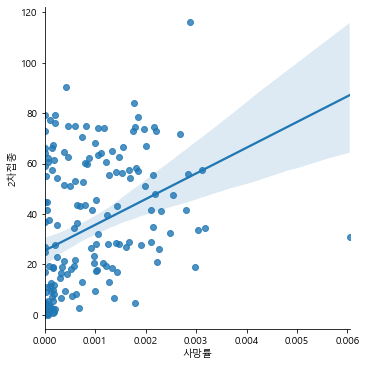

In [39]:
sns.lmplot(x='사망률', y='2차접종', data=corona)

### 백신 접종률과 사망률은 0.324의 양의 상관관계를 갖는다.
 * 데이터로 봤을 때, 이 부분에 대한 확인이 필요해 보인다.

### 2-2 백신 접종률과 중증 감소의 관계는 어떠한가?

In [40]:
corona.head(3)

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종가능률(인구),발생률_순위,접종률_순위,확진자비율(인구),1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률
0,미국,U.S.,132772,331002651,43942335,390114340.0,60.9,13.0,47.5,0.132755,64.3,55.3,21819\n-275,1.6,76.0,187382.0,709119,2781.0,33394833.0,208564.0,716762.0,0.002142
1,인도,India,24431,1380004385,33714241,870566900.0,31.8,103.0,95.0,0.024431,46.2,16.4,8944,1.3,97.8,21093.0,447699,337.0,32976760.0,28144.0,7488509.0,0.000324
2,브라질,Brazil,100520,212559417,21366395,232250880.0,56.3,29.0,61.5,0.100520,71.1,41.4,8318,2.8,95.3,14423.0,594702,218.0,20361191.0,20818.0,3757702.0,0.002798


In [41]:
corona['위중증'].unique()

array(['21819\n-275', '8944', '8318', '878\n-38', '2300', '633', '1609',
       '6124\n-85', '1200\n-37', '542', '837', '488\n+5', '1435', nan,
       '4798', '168\n+15', '3170', '177', '978\n-72', '1025\n+2',
       '160\n-17', '516\n-5', '1066\n-44', '36\n+6', '389\n+9', '638',
       '3324', '1408\n-5', '641', '4015\n-18', '206\n-10', '1267\n+49',
       '35\n-7', '74\n-5', '552\n-46', '251\n+26', '221', '406\n+20',
       '209', '74\n+3', '446\n-30', '240\n+6', '316', '323\n-14', '200',
       '5', '227\n-17', '443\n-16', '759', '220', '432\n-108', '61', '23',
       '10\n-2', '119\n+20', '102\n+5', '13\n-1', '66\n+1', '681',
       '418\n-33', '15\n-3', '791\n-7', '203\n+11', '324\n+5', '20\n-2',
       '90', '192', '74\n+6', '160\n-1', '4\n+1', '92', '16', '25\n-3',
       '11', '18', '21\n+2', '131', '1', '3', '61\n+9', '1124', '19\n+2',
       '32', '25', '12', '16\n-1', '42', '327', '33\n-6', '127', '301',
       '9\n-2', '27\n-3', '152', '46\n+15', '8', '9\n-1', '67', '10\n-2

### Learn02. Pandas 문자열 처리
 * [].str.strip() : 앞뒤 공백을 제거
 * [].str.lstrip() : 앞 공백을 제거
 * [].str.rstrip() : 뒤 공백을 제거
 * [].str.split('구분자', n=1, expand=True)  : 구분자를 기준으로 n개로 나눈다. expand=True(여러컬럼), False(하나의 컬럼)

In [42]:
corona[['위중증_수', '위중증_증감']] = corona['위중증'].str.split('\n', n=2, expand=True)
corona.head(15)

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종가능률(인구),발생률_순위,접종률_순위,확진자비율(인구),1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률,위중증_수,위중증_증감
0,미국,U.S.,132772,331002651,43942335,390114340.0,60.9,13.0,47.5,0.132755,64.3,55.3,21819\n-275,1.6,76.0,187382.0,709119,2781.0,33394833.0,208564.0,716762.0,0.002142,21819,-275
1,인도,India,24431,1380004385,33714241,870566900.0,31.8,103.0,95.0,0.024431,46.2,16.4,8944,1.3,97.8,21093.0,447699,337.0,32976760.0,28144.0,7488509.0,0.000324,8944,None
2,브라질,Brazil,100520,212559417,21366395,232250880.0,56.3,29.0,61.5,0.100520,71.1,41.4,8318,2.8,95.3,14423.0,594702,218.0,20361191.0,20818.0,3757702.0,0.002798,8318,None
3,영국,U.K.,113959,67886011,7701715,93500856.0,70.0,20.0,26.0,0.113451,73.0,67.0,878\n-38,1.8,80.7,37485.0,136208,40.0,6219111.0,33541.0,63103.0,0.002006,878,-38
4,러시아,Russia,51151,145934462,7464708,89682024.0,30.6,77.0,99.5,0.051151,32.4,28.4,2300,2.8,88.9,21559.0,205531,852.0,6635485.0,17368.0,220487.0,0.001408,2300,None
5,터키,Turkey,83789,84339067,7066688,108344730.0,65.1,44.0,38.0,0.083789,64.4,52.7,633,0.9,92.3,27188.0,63372,206.0,6522435.0,25160.0,386308.0,0.000751,633,None
6,프랑스,France,107174,65273511,6995628,93817816.0,72.4,23.0,22.0,0.107174,77.4,74.4,1609,1.7,96.3,1309.0,116537,74.0,6737491.0,14460.0,435139.0,0.001785,1609,None
7,이란,Iran,66192,83992949,5559691,43372270.0,26.0,62.0,107.5,0.066192,35.5,16.8,6124\n-85,2.2,89.7,11701.0,119888,239.0,4988109.0,22011.0,1368407.0,0.001427,6124,-85
8,아르헨티나,Argentina,116204,45195774,5251940,51153324.0,56.9,18.0,58.5,0.116204,65.6,47.7,1200\n-37,2.2,97.4,1538.0,114954,92.0,5113603.0,2007.0,260261.0,0.002543,1200,-37
9,콜롬비아,Colombia,97335,50882891,4952690,39610550.0,39.3,33.0,80.0,0.097335,50.9,32.6,542,2.5,96.8,1015.0,126178,33.0,4793387.0,1672.0,166927.0,0.002480,542,None


In [43]:
### 사망률 = 사망자수/인구수
corona['위중증률'] = corona['위중증_수'] /  corona['인구수']
corona.head(15)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

### 에러 발생 
 * TypeError: unsupported operand type(s) for /: 'str' and 'int'

### Learn 03. 데이터 타입 변경하기

 * [].astype(dtype) :  모든 열의 데이터 타입을 변경
 * [].astype( {'컬럼명':dtype} ) : 특정 컬럼의 데이터 타입을 변경
   * str, int, float, category 등
   * int8, int16, int32, int64와 같이 변경 가능

In [44]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국가명        177 non-null    object 
 1   eng_code   177 non-null    object 
 2   발생률        177 non-null    int64  
 3   인구수        177 non-null    int64  
 4   확진자_합계     177 non-null    int64  
 5   백신접종       177 non-null    float64
 6   접종가능률(인구)  177 non-null    float64
 7   발생률_순위     177 non-null    float64
 8   접종률_순위     177 non-null    float64
 9   확진자비율(인구)  177 non-null    float64
 10  1차접종       177 non-null    float64
 11  2차접종       177 non-null    float64
 12  위중증        131 non-null    object 
 13  치명(%)      177 non-null    object 
 14  완치(%)      174 non-null    float64
 15  확진자1일      151 non-null    float64
 16  사망자합계      177 non-null    int64  
 17  사망자1일      121 non-null    float64
 18  완치합계       174 non-null    float64
 19  완치1일       133 non-null    float64
 20  접종비율(일간)  

In [45]:
corona['위중증_수'] = corona['위중증_수'].astype('int64')

ValueError: cannot convert float NaN to integer

### 에러 발생 
 * ValueError: cannot convert float NaN to integer

In [46]:
corona['위중증_수'].unique()

array(['21819', '8944', '8318', '878', '2300', '633', '1609', '6124',
       '1200', '542', '837', '488', '1435', nan, '4798', '168', '3170',
       '177', '978', '1025', '160', '516', '1066', '36', '389', '638',
       '3324', '1408', '641', '4015', '206', '1267', '35', '74', '552',
       '251', '221', '406', '209', '446', '240', '316', '323', '200', '5',
       '227', '443', '759', '220', '432', '61', '23', '10', '119', '102',
       '13', '66', '681', '418', '15', '791', '203', '324', '20', '90',
       '192', '4', '92', '16', '25', '11', '18', '21', '131', '1', '3',
       '1124', '19', '32', '12', '42', '327', '33', '127', '301', '9',
       '27', '152', '46', '8', '67', '22', '30', '24', '26', '7', '34',
       '2'], dtype=object)

### Learn 04. 어떻게 NaN을 체크할 것인가?

In [47]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국가명        177 non-null    object 
 1   eng_code   177 non-null    object 
 2   발생률        177 non-null    int64  
 3   인구수        177 non-null    int64  
 4   확진자_합계     177 non-null    int64  
 5   백신접종       177 non-null    float64
 6   접종가능률(인구)  177 non-null    float64
 7   발생률_순위     177 non-null    float64
 8   접종률_순위     177 non-null    float64
 9   확진자비율(인구)  177 non-null    float64
 10  1차접종       177 non-null    float64
 11  2차접종       177 non-null    float64
 12  위중증        131 non-null    object 
 13  치명(%)      177 non-null    object 
 14  완치(%)      174 non-null    float64
 15  확진자1일      151 non-null    float64
 16  사망자합계      177 non-null    int64  
 17  사망자1일      121 non-null    float64
 18  완치합계       174 non-null    float64
 19  완치1일       133 non-null    float64
 20  접종비율(일간)  

### 위중증_수가 isnull()인 것을 살펴보기

In [48]:
corona[  corona['위중증_수'].isnull() ] 

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종가능률(인구),발생률_순위,접종률_순위,확진자비율(인구),1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률,위중증_수,위중증_증감
13,인도네시아,Indonesia,15397,273523615,4211460,1.369410e+08,25.7,110.0,110.0,0.015397,32.2,18.10,NaN,3.4,95.7,2057.0,141709,124.0,4031099.0,3551.0,1755924.0,0.000518,NaN,NaN
41,네팔,Nepal,27226,29136808,793271,1.264563e+07,22.2,98.0,116.0,0.027226,23.2,21.20,NaN,1.4,96.3,904.0,11115,12.0,763734.0,1318.0,134788.0,0.000381,NaN,NaN
42,베트남,Vietnam,7917,97338579,770640,3.836725e+07,19.9,123.0,122.0,0.007917,31.5,8.20,NaN,2.5,72.7,4589.0,18936,178.0,559941.0,21487.0,610286.0,0.000195,NaN,NaN
44,아랍에미레이트,UAE,74361,9890402,735457,1.987280e+07,92.4,56.0,3.0,0.074361,85.9,76.00,NaN,0.3,99.0,277.0,2094,NaN,727845.0,329.0,55176.0,0.000212,NaN,NaN
48,조지아,Georgia,152749,3989167,609340,1.749457e+06,23.5,9.0,115.0,0.152749,26.1,20.90,NaN,1.5,95.3,2185.0,8884,40.0,580891.0,2010.0,13488.0,0.002227,NaN,NaN
51,벨라루스,Belarus,56523,9449323,534104,3.389520e+06,17.9,74.0,127.0,0.056523,19.8,16.00,NaN,0.8,96.6,1955.0,4114,12.0,516030.0,1469.0,26145.0,0.000435,NaN,NaN
53,스리랑카,Sri Lanka,24031,21413249,514592,2.600244e+07,59.6,104.0,52.5,0.024031,65.9,53.20,NaN,2.5,88.5,983.0,12731,51.0,455344.0,812.0,162348.0,0.000595,NaN,NaN
57,아제르바이잔,Azerbaijan,47479,10139177,481401,8.349945e+06,41.8,83.0,78.0,0.047479,47.2,36.40,NaN,1.3,94.1,NaN,6476,NaN,452968.0,NaN,53342.0,0.000639,NaN,NaN
60,미얀마,Myanmar,8444,54409800,459436,9.001616e+06,8.5,122.0,139.0,0.008444,10.5,6.60,NaN,3.8,90.1,1282.0,17583,56.0,413821.0,1866.0,163440.0,0.000323,NaN,NaN
70,리비아,Libya,49174,6871292,337890,1.546967e+06,11.8,82.0,134.0,0.049174,20.7,2.50,NaN,1.4,75.8,NaN,4617,NaN,256121.0,NaN,11809.0,0.000672,NaN,NaN


In [49]:
corona['위중증_수'].isnull().sum()

46

In [50]:
corona['위중증_수'].isna().sum()

46

### (의문) 왜 47개국은 위증증 통계가 없을까?

### 위증증_수2를 만들고, 위증증수가 없는 것은 -99999로 만들자.

In [51]:
corona['위중증_수2'] = corona['위중증_수'].copy()

In [52]:
corona.loc[ corona['위중증_수2'].isnull(), "위중증_수2"] = -99999
corona[  corona['위중증_수2'].isnull() ] 

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종가능률(인구),발생률_순위,접종률_순위,확진자비율(인구),1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률,위중증_수,위중증_증감,위중증_수2


In [53]:
corona['위중증_수2'] = corona['위중증_수2'].astype('int64')

In [54]:
### 사망률 = 사망자수/인구수
corona['위중증률'] = corona['위중증_수2'] /  corona['인구수']
corona.head(15)

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종가능률(인구),발생률_순위,접종률_순위,확진자비율(인구),1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률,위중증_수,위중증_증감,위중증_수2,위중증률
0,미국,U.S.,132772,331002651,43942335,390114340.0,60.9,13.0,47.5,0.132755,64.3,55.3,21819\n-275,1.6,76.0,187382.0,709119,2781.0,33394833.0,208564.0,716762.0,0.002142,21819,-275,21819,0.000066
1,인도,India,24431,1380004385,33714241,870566900.0,31.8,103.0,95.0,0.024431,46.2,16.4,8944,1.3,97.8,21093.0,447699,337.0,32976760.0,28144.0,7488509.0,0.000324,8944,None,8944,0.000006
2,브라질,Brazil,100520,212559417,21366395,232250880.0,56.3,29.0,61.5,0.100520,71.1,41.4,8318,2.8,95.3,14423.0,594702,218.0,20361191.0,20818.0,3757702.0,0.002798,8318,None,8318,0.000039
3,영국,U.K.,113959,67886011,7701715,93500856.0,70.0,20.0,26.0,0.113451,73.0,67.0,878\n-38,1.8,80.7,37485.0,136208,40.0,6219111.0,33541.0,63103.0,0.002006,878,-38,878,0.000013
4,러시아,Russia,51151,145934462,7464708,89682024.0,30.6,77.0,99.5,0.051151,32.4,28.4,2300,2.8,88.9,21559.0,205531,852.0,6635485.0,17368.0,220487.0,0.001408,2300,None,2300,0.000016
5,터키,Turkey,83789,84339067,7066688,108344730.0,65.1,44.0,38.0,0.083789,64.4,52.7,633,0.9,92.3,27188.0,63372,206.0,6522435.0,25160.0,386308.0,0.000751,633,None,633,0.000008
6,프랑스,France,107174,65273511,6995628,93817816.0,72.4,23.0,22.0,0.107174,77.4,74.4,1609,1.7,96.3,1309.0,116537,74.0,6737491.0,14460.0,435139.0,0.001785,1609,None,1609,0.000025
7,이란,Iran,66192,83992949,5559691,43372270.0,26.0,62.0,107.5,0.066192,35.5,16.8,6124\n-85,2.2,89.7,11701.0,119888,239.0,4988109.0,22011.0,1368407.0,0.001427,6124,-85,6124,0.000073
8,아르헨티나,Argentina,116204,45195774,5251940,51153324.0,56.9,18.0,58.5,0.116204,65.6,47.7,1200\n-37,2.2,97.4,1538.0,114954,92.0,5113603.0,2007.0,260261.0,0.002543,1200,-37,1200,0.000027
9,콜롬비아,Colombia,97335,50882891,4952690,39610550.0,39.3,33.0,80.0,0.097335,50.9,32.6,542,2.5,96.8,1015.0,126178,33.0,4793387.0,1672.0,166927.0,0.002480,542,None,542,0.000011


In [55]:
corona.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '접종가능률(인구)',
       '발생률_순위', '접종률_순위', '확진자비율(인구)', '1차접종', '2차접종', '위중증', '치명(%)',
       '완치(%)', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)', '사망률',
       '위중증_수', '위중증_증감', '위중증_수2', '위중증률'],
      dtype='object')

In [57]:
corona_sel = ['국가명', '발생률', '인구수', '확진자_합계', '백신접종', '2차접종',  
              '사망률', '위중증', '위중증_증감', '위중증_수', '위중증_수2', '위중증률']
corona_part = corona[corona_sel]
corona_part

,국가명,발생률,인구수,확진자_합계,백신접종,2차접종,사망률,위중증,위중증_증감,위중증_수,위중증_수2,위중증률
0,미국,132772,331002651,43942335,3.901143e+08,55.30,0.002142,21819\n-275,-275,21819,21819,6.591790e-05
1,인도,24431,1380004385,33714241,8.705669e+08,16.40,0.000324,8944,None,8944,8944,6.481139e-06
2,브라질,100520,212559417,21366395,2.322509e+08,41.40,0.002798,8318,None,8318,8318,3.913259e-05
3,영국,113959,67886011,7701715,9.350086e+07,67.00,0.002006,878\n-38,-38,878,878,1.293345e-05
4,러시아,51151,145934462,7464708,8.968202e+07,28.40,0.001408,2300,None,2300,2300,1.576050e-05
5,터키,83789,84339067,7066688,1.083447e+08,52.70,0.000751,633,None,633,633,7.505419e-06
6,프랑스,107174,65273511,6995628,9.381782e+07,74.40,0.001785,1609,None,1609,1609,2.465012e-05
7,이란,66192,83992949,5559691,4.337227e+07,16.80,0.001427,6124\n-85,-85,6124,6124,7.291088e-05
8,아르헨티나,116204,45195774,5251940,5.115332e+07,47.70,0.002543,1200\n-37,-37,1200,1200,2.655115e-05
9,콜롬비아,97335,50882891,4952690,3.961055e+07,32.60,0.002480,542,None,542,542,1.065191e-05


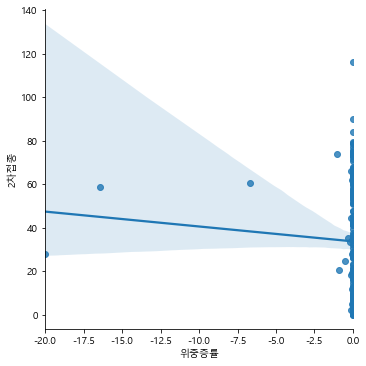

In [59]:
sns.lmplot(x='위중증률', y='2차접종', data=corona_part)

In [60]:
corona_part[['위중증률', '2차접종']].corr()

,위중증률,2차접종
위중증률,1.00000,-0.05124
2차접종,-0.05124,1.00000


### 결과 확인 : 인구당 접종률과 위중증률은 거의 관계가 없다.

### 오류가 없을까?
 * 오류: -99999 데이터가 있었기에 정확하지 않을 수 있다.

In [61]:
corona_part['위중증'].notnull().sum()

131

In [62]:
corona_part = corona_part[ corona_part['위중증'].notnull() ] 
corona_part['위중증'].isnull().sum()

0

In [63]:
corona_part[['위중증률', '2차접종']].corr()

,위중증률,2차접종
위중증률,1.000000,0.234562
2차접종,0.234562,1.000000


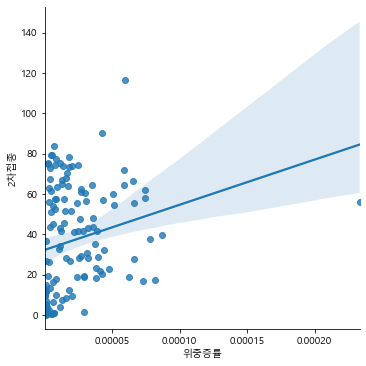

In [64]:
sns.lmplot(x='위중증률', y='2차접종', data=corona_part)

### 확인 : 데이터가 있는 131개국의 인구당 접종률과 위중증률은 0.2755로 양의 상관관계를 갖는다.

In [65]:
corona

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종가능률(인구),발생률_순위,접종률_순위,확진자비율(인구),1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률,위중증_수,위중증_증감,위중증_수2,위중증률
0,미국,U.S.,132772,331002651,43942335,3.901143e+08,60.9,13.0,47.5,0.132755,64.3,55.30,21819\n-275,1.6,76.0,187382.0,709119,2781.0,33394833.0,208564.0,716762.0,0.002142,21819,-275,21819,6.591790e-05
1,인도,India,24431,1380004385,33714241,8.705669e+08,31.8,103.0,95.0,0.024431,46.2,16.40,8944,1.3,97.8,21093.0,447699,337.0,32976760.0,28144.0,7488509.0,0.000324,8944,None,8944,6.481139e-06
2,브라질,Brazil,100520,212559417,21366395,2.322509e+08,56.3,29.0,61.5,0.100520,71.1,41.40,8318,2.8,95.3,14423.0,594702,218.0,20361191.0,20818.0,3757702.0,0.002798,8318,None,8318,3.913259e-05
3,영국,U.K.,113959,67886011,7701715,9.350086e+07,70.0,20.0,26.0,0.113451,73.0,67.00,878\n-38,1.8,80.7,37485.0,136208,40.0,6219111.0,33541.0,63103.0,0.002006,878,-38,878,1.293345e-05
4,러시아,Russia,51151,145934462,7464708,8.968202e+07,30.6,77.0,99.5,0.051151,32.4,28.40,2300,2.8,88.9,21559.0,205531,852.0,6635485.0,17368.0,220487.0,0.001408,2300,None,2300,1.576050e-05
5,터키,Turkey,83789,84339067,7066688,1.083447e+08,65.1,44.0,38.0,0.083789,64.4,52.70,633,0.9,92.3,27188.0,63372,206.0,6522435.0,25160.0,386308.0,0.000751,633,None,633,7.505419e-06
6,프랑스,France,107174,65273511,6995628,9.381782e+07,72.4,23.0,22.0,0.107174,77.4,74.40,1609,1.7,96.3,1309.0,116537,74.0,6737491.0,14460.0,435139.0,0.001785,1609,None,1609,2.465012e-05
7,이란,Iran,66192,83992949,5559691,4.337227e+07,26.0,62.0,107.5,0.066192,35.5,16.80,6124\n-85,2.2,89.7,11701.0,119888,239.0,4988109.0,22011.0,1368407.0,0.001427,6124,-85,6124,7.291088e-05
8,아르헨티나,Argentina,116204,45195774,5251940,5.115332e+07,56.9,18.0,58.5,0.116204,65.6,47.70,1200\n-37,2.2,97.4,1538.0,114954,92.0,5113603.0,2007.0,260261.0,0.002543,1200,-37,1200,2.655115e-05
9,콜롬비아,Colombia,97335,50882891,4952690,3.961055e+07,39.3,33.0,80.0,0.097335,50.9,32.60,542,2.5,96.8,1015.0,126178,33.0,4793387.0,1672.0,166927.0,0.002480,542,None,542,1.065191e-05


### 실습과제 : 인구 100만 이상의 국가에 대해서 다시 수행해 보자.
  * 접종률과 인구당 발생률 관계 확인
  * 접종률과 사망률과 중증률 관계 확인

### 의문 : 그렇다면 전체 국가가 아닌 30개의 국가의 데이터를 확인해 보면 어떨까?

## 02. 접종률이 높은 30개의 국가의 데이터를 확인해 보기

In [66]:
corona_top30 = corona[corona['접종률_순위']<=30]
corona_top30.shape

(30, 26)

In [67]:
corona_top30

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종가능률(인구),발생률_순위,접종률_순위,확진자비율(인구),1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률,위중증_수,위중증_증감,위중증_수2,위중증률
3,영국,U.K.,113959,67886011,7701715,9.350086e+07,70.0,20.0,26.0,0.113451,73.0,67.0,878\n-38,1.8,80.7,37485.0,136208,40.0,6219111.0,33541.0,63103.0,0.002006,878,-38,878,0.000013
6,프랑스,France,107174,65273511,6995628,9.381782e+07,72.4,23.0,22.0,0.107174,77.4,74.4,1609,1.7,96.3,1309.0,116537,74.0,6737491.0,14460.0,435139.0,0.001785,1609,None,1609,0.000025
10,스페인,Spain,105907,46754778,4951640,6.986754e+07,75.1,26.0,18.0,0.105907,80.9,78.4,837,1.7,95.6,5039.0,86298,69.0,4736022.0,27855.0,76386.0,0.001846,837,None,837,0.000018
11,이탈리아,Italy,77157,60461826,4662087,8.415858e+07,69.7,51.0,27.0,0.077108,74.3,74.4,488\n+5,2.8,95.0,1773.0,130742,45.0,4430265.0,2892.0,222470.0,0.002162,488,+5,488,0.000008
24,칠레,Chile,86460,19116201,1652795,3.155275e+07,82.6,41.0,9.5,0.086460,78.5,73.8,389\n+9,2.3,97.3,431.0,37449,4.0,1608584.0,1088.0,109571.0,0.001959,389,+9,389,0.000020
25,캐나다,Canada,42722,37742154,1612431,5.596481e+07,74.6,87.0,19.0,0.042722,76.2,70.6,638,1.7,95.4,10052.0,27698,49.0,1538280.0,10029.0,109885.0,0.000734,638,None,638,0.000017
28,이스라엘,Israel,146753,8655535,1270230,1.495801e+07,82.6,10.0,9.5,0.146753,67.3,62.1,641,0.6,94.9,NaN,7684,NaN,1205657.0,NaN,28216.0,0.000888,641,None,641,0.000074
30,벨기에,Belgium,106851,11589623,1238358,1.662373e+07,72.6,24.0,21.0,0.106851,74.8,73.1,206\n-10,2.1,93.1,4635.0,25568,14.0,1152355.0,7685.0,21138.0,0.002206,206,-10,206,0.000018
33,포르투갈,Portugal,104718,10196709,1067775,1.594432e+07,77.6,27.0,13.0,0.104718,86.9,84.0,74\n-5,1.7,95.5,600.0,17962,7.0,1019266.0,1331.0,31090.0,0.001762,74,-5,74,0.000007
37,쿠바,Cuba,76528,11326616,866808,1.999146e+07,88.2,53.0,5.0,0.076528,78.4,43.4,406\n+20,0.8,95.4,6009.0,7330,51.0,826727.0,7105.0,300725.0,0.000647,406,+20,406,0.000036


### Learn 05. 데이터의 인덱스를 다시 재설정하기

* [].reset_index(inplace=True)

In [68]:
corona_top30.reset_index(inplace=True)
corona_top30

,index,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종가능률(인구),발생률_순위,접종률_순위,확진자비율(인구),1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률,위중증_수,위중증_증감,위중증_수2,위중증률
0,3,영국,U.K.,113959,67886011,7701715,9.350086e+07,70.0,20.0,26.0,0.113451,73.0,67.0,878\n-38,1.8,80.7,37485.0,136208,40.0,6219111.0,33541.0,63103.0,0.002006,878,-38,878,0.000013
1,6,프랑스,France,107174,65273511,6995628,9.381782e+07,72.4,23.0,22.0,0.107174,77.4,74.4,1609,1.7,96.3,1309.0,116537,74.0,6737491.0,14460.0,435139.0,0.001785,1609,None,1609,0.000025
2,10,스페인,Spain,105907,46754778,4951640,6.986754e+07,75.1,26.0,18.0,0.105907,80.9,78.4,837,1.7,95.6,5039.0,86298,69.0,4736022.0,27855.0,76386.0,0.001846,837,None,837,0.000018
3,11,이탈리아,Italy,77157,60461826,4662087,8.415858e+07,69.7,51.0,27.0,0.077108,74.3,74.4,488\n+5,2.8,95.0,1773.0,130742,45.0,4430265.0,2892.0,222470.0,0.002162,488,+5,488,0.000008
4,24,칠레,Chile,86460,19116201,1652795,3.155275e+07,82.6,41.0,9.5,0.086460,78.5,73.8,389\n+9,2.3,97.3,431.0,37449,4.0,1608584.0,1088.0,109571.0,0.001959,389,+9,389,0.000020
5,25,캐나다,Canada,42722,37742154,1612431,5.596481e+07,74.6,87.0,19.0,0.042722,76.2,70.6,638,1.7,95.4,10052.0,27698,49.0,1538280.0,10029.0,109885.0,0.000734,638,None,638,0.000017
6,28,이스라엘,Israel,146753,8655535,1270230,1.495801e+07,82.6,10.0,9.5,0.146753,67.3,62.1,641,0.6,94.9,NaN,7684,NaN,1205657.0,NaN,28216.0,0.000888,641,None,641,0.000074
7,30,벨기에,Belgium,106851,11589623,1238358,1.662373e+07,72.6,24.0,21.0,0.106851,74.8,73.1,206\n-10,2.1,93.1,4635.0,25568,14.0,1152355.0,7685.0,21138.0,0.002206,206,-10,206,0.000018
8,33,포르투갈,Portugal,104718,10196709,1067775,1.594432e+07,77.6,27.0,13.0,0.104718,86.9,84.0,74\n-5,1.7,95.5,600.0,17962,7.0,1019266.0,1331.0,31090.0,0.001762,74,-5,74,0.000007
9,37,쿠바,Cuba,76528,11326616,866808,1.999146e+07,88.2,53.0,5.0,0.076528,78.4,43.4,406\n+20,0.8,95.4,6009.0,7330,51.0,826727.0,7105.0,300725.0,0.000647,406,+20,406,0.000036


### Learn 06. 데이터를 정렬시키기 2가지
 * sort_index() : 인덱스를 기준으로 정렬
 * sort_values(by=[], ascending=False, axis=0,1, inplace=True or False) : 컬럼의 값을 기준으로 데이터 정렬
   * by : 정렬할 열 선택
   * axis : 0 : index, 1: columns

In [69]:
corona_top30.columns

Index(['index', '국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '접종가능률(인구)',
       '발생률_순위', '접종률_순위', '확진자비율(인구)', '1차접종', '2차접종', '위중증', '치명(%)',
       '완치(%)', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)', '사망률',
       '위중증_수', '위중증_증감', '위중증_수2', '위중증률'],
      dtype='object')

In [76]:
corona_sel = ['국가명', '발생률', '인구수', '확진자_합계', '백신접종', '확진자비율(인구)', 
              '발생률_순위', '접종률_순위', '사망률', '2차접종',
              '위중증_수2', '위중증_증감', '위중증률']
corona_top30_part = corona_top30[corona_sel]
corona_top30_part

,국가명,발생률,인구수,확진자_합계,백신접종,확진자비율(인구),발생률_순위,접종률_순위,사망률,2차접종,위중증_수2,위중증_증감,위중증률
0,영국,113959,67886011,7701715,9.350086e+07,0.113451,20.0,26.0,0.002006,67.0,878,-38,0.000013
1,프랑스,107174,65273511,6995628,9.381782e+07,0.107174,23.0,22.0,0.001785,74.4,1609,None,0.000025
2,스페인,105907,46754778,4951640,6.986754e+07,0.105907,26.0,18.0,0.001846,78.4,837,None,0.000018
3,이탈리아,77157,60461826,4662087,8.415858e+07,0.077108,51.0,27.0,0.002162,74.4,488,+5,0.000008
4,칠레,86460,19116201,1652795,3.155275e+07,0.086460,41.0,9.5,0.001959,73.8,389,+9,0.000020
5,캐나다,42722,37742154,1612431,5.596481e+07,0.042722,87.0,19.0,0.000734,70.6,638,None,0.000017
6,이스라엘,146753,8655535,1270230,1.495801e+07,0.146753,10.0,9.5,0.000888,62.1,641,None,0.000074
7,벨기에,106851,11589623,1238358,1.662373e+07,0.106851,24.0,21.0,0.002206,73.1,206,-10,0.000018
8,포르투갈,104718,10196709,1067775,1.594432e+07,0.104718,27.0,13.0,0.001762,84.0,74,-5,0.000007
9,쿠바,76528,11326616,866808,1.999146e+07,0.076528,53.0,5.0,0.000647,43.4,406,+20,0.000036


In [77]:
# 접종률_순위 을 기준으로 정렬, 내림차순
corona_top30_part_sorted = corona_top30_part.sort_values(by=['접종률_순위'], ascending=True)

In [78]:
corona_top30_part_sorted

,국가명,발생률,인구수,확진자_합계,백신접종,확진자비율(인구),발생률_순위,접종률_순위,사망률,2차접종,위중증_수2,위중증_증감,위중증률
26,지브롤터,164198,33691,5532,7.950200e+04,0.164198,4.0,1.0,0.002879,116.4,2,None,0.000059
21,몰디브,156294,540544,84484,7.276640e+05,0.156294,8.0,2.0,0.000427,90.3,23,None,0.000043
10,아랍에미레이트,74361,9890402,735457,1.987280e+07,0.074361,56.0,3.0,0.000212,76.0,-99999,NaN,-0.010111
29,그린란드,9952,56770,565,1.023570e+05,0.009952,119.0,4.0,0.000000,64.3,2,None,0.000035
9,쿠바,76528,11326616,866808,1.999146e+07,0.076528,53.0,5.0,0.000647,43.4,406,+20,0.000036
11,우루과이,111860,3473730,388572,6.190557e+06,0.111860,21.0,6.0,0.001743,72.9,13,-1,0.000004
15,바레인,161543,1701575,274877,2.561756e+06,0.161543,5.0,7.0,0.000816,74.9,4,+1,0.000002
16,카타르,82082,2881053,236482,4.696753e+06,0.082082,47.0,8.0,0.000210,79.4,16,None,0.000006
4,칠레,86460,19116201,1652795,3.155275e+07,0.086460,41.0,9.5,0.001959,73.8,389,+9,0.000020
6,이스라엘,146753,8655535,1270230,1.495801e+07,0.146753,10.0,9.5,0.000888,62.1,641,None,0.000074


In [79]:
corona_top30_part_sorted.reset_index(inplace=True)

In [80]:
corona_top30_part_sorted

,index,국가명,발생률,인구수,확진자_합계,백신접종,확진자비율(인구),발생률_순위,접종률_순위,사망률,2차접종,위중증_수2,위중증_증감,위중증률
0,26,지브롤터,164198,33691,5532,7.950200e+04,0.164198,4.0,1.0,0.002879,116.4,2,None,0.000059
1,21,몰디브,156294,540544,84484,7.276640e+05,0.156294,8.0,2.0,0.000427,90.3,23,None,0.000043
2,10,아랍에미레이트,74361,9890402,735457,1.987280e+07,0.074361,56.0,3.0,0.000212,76.0,-99999,NaN,-0.010111
3,29,그린란드,9952,56770,565,1.023570e+05,0.009952,119.0,4.0,0.000000,64.3,2,None,0.000035
4,9,쿠바,76528,11326616,866808,1.999146e+07,0.076528,53.0,5.0,0.000647,43.4,406,+20,0.000036
5,11,우루과이,111860,3473730,388572,6.190557e+06,0.111860,21.0,6.0,0.001743,72.9,13,-1,0.000004
6,15,바레인,161543,1701575,274877,2.561756e+06,0.161543,5.0,7.0,0.000816,74.9,4,+1,0.000002
7,16,카타르,82082,2881053,236482,4.696753e+06,0.082082,47.0,8.0,0.000210,79.4,16,None,0.000006
8,4,칠레,86460,19116201,1652795,3.155275e+07,0.086460,41.0,9.5,0.001959,73.8,389,+9,0.000020
9,6,이스라엘,146753,8655535,1270230,1.495801e+07,0.146753,10.0,9.5,0.000888,62.1,641,None,0.000074


### 상관관계 확인하기

In [81]:
corona_top30_part_sorted[['2차접종', '확진자비율(인구)']].corr()

,2차접종,확진자비율(인구)
2차접종,1.000000,0.299941
확진자비율(인구),0.299941,1.000000


In [82]:
corona_top30_part_sorted[['2차접종', '사망률']].corr()

,2차접종,사망률
2차접종,1.000000,0.341103
사망률,0.341103,1.000000


In [83]:
corona_top30_part_sorted[['2차접종', '위중증률']].corr()

,2차접종,위중증률
2차접종,1.00000,0.00598
위중증률,0.00598,1.00000


### 접종률 상위 30개국의 데이터 확인 결과 큰 연관관계가 보이지 않는다.

### 실습 : 위증증 데이터는 처리가 안되었다. 이를 처리해 보자.

### 03. 200만 이상의 국가에 대해서 확인

In [84]:
corona_200m = corona[corona['인구수']>=2000000]
corona_200m.shape

(136, 26)

In [85]:
corona_200m.reset_index(inplace=True)
corona_200m.head(10)

,index,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종가능률(인구),발생률_순위,접종률_순위,확진자비율(인구),1차접종,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),사망률,위중증_수,위중증_증감,위중증_수2,위중증률
0,0,미국,U.S.,132772,331002651,43942335,390114340.0,60.9,13.0,47.5,0.132755,64.3,55.3,21819\n-275,1.6,76.0,187382.0,709119,2781.0,33394833.0,208564.0,716762.0,0.002142,21819,-275,21819,0.000066
1,1,인도,India,24431,1380004385,33714241,870566900.0,31.8,103.0,95.0,0.024431,46.2,16.4,8944,1.3,97.8,21093.0,447699,337.0,32976760.0,28144.0,7488509.0,0.000324,8944,None,8944,0.000006
2,2,브라질,Brazil,100520,212559417,21366395,232250880.0,56.3,29.0,61.5,0.100520,71.1,41.4,8318,2.8,95.3,14423.0,594702,218.0,20361191.0,20818.0,3757702.0,0.002798,8318,None,8318,0.000039
3,3,영국,U.K.,113959,67886011,7701715,93500856.0,70.0,20.0,26.0,0.113451,73.0,67.0,878\n-38,1.8,80.7,37485.0,136208,40.0,6219111.0,33541.0,63103.0,0.002006,878,-38,878,0.000013
4,4,러시아,Russia,51151,145934462,7464708,89682024.0,30.6,77.0,99.5,0.051151,32.4,28.4,2300,2.8,88.9,21559.0,205531,852.0,6635485.0,17368.0,220487.0,0.001408,2300,None,2300,0.000016
5,5,터키,Turkey,83789,84339067,7066688,108344730.0,65.1,44.0,38.0,0.083789,64.4,52.7,633,0.9,92.3,27188.0,63372,206.0,6522435.0,25160.0,386308.0,0.000751,633,None,633,0.000008
6,6,프랑스,France,107174,65273511,6995628,93817816.0,72.4,23.0,22.0,0.107174,77.4,74.4,1609,1.7,96.3,1309.0,116537,74.0,6737491.0,14460.0,435139.0,0.001785,1609,None,1609,0.000025
7,7,이란,Iran,66192,83992949,5559691,43372270.0,26.0,62.0,107.5,0.066192,35.5,16.8,6124\n-85,2.2,89.7,11701.0,119888,239.0,4988109.0,22011.0,1368407.0,0.001427,6124,-85,6124,0.000073
8,8,아르헨티나,Argentina,116204,45195774,5251940,51153324.0,56.9,18.0,58.5,0.116204,65.6,47.7,1200\n-37,2.2,97.4,1538.0,114954,92.0,5113603.0,2007.0,260261.0,0.002543,1200,-37,1200,0.000027
9,9,콜롬비아,Colombia,97335,50882891,4952690,39610550.0,39.3,33.0,80.0,0.097335,50.9,32.6,542,2.5,96.8,1015.0,126178,33.0,4793387.0,1672.0,166927.0,0.002480,542,None,542,0.000011


In [87]:
corona_200m.columns

Index(['index', '국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '접종가능률(인구)',
       '발생률_순위', '접종률_순위', '확진자비율(인구)', '1차접종', '2차접종', '위중증', '치명(%)',
       '완치(%)', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)', '사망률',
       '위중증_수', '위중증_증감', '위중증_수2', '위중증률'],
      dtype='object')

In [88]:
corona_sel = ['국가명', '발생률', '인구수', '확진자_합계', '백신접종', '2차접종', 
              '확진자비율(인구)', '발생률_순위', '접종률_순위', '사망률', 
              '위중증_수2', '위중증_증감', '위중증률']
corona_200m_part = corona_200m[corona_sel]
corona_200m_part.head(10)


,국가명,발생률,인구수,확진자_합계,백신접종,2차접종,확진자비율(인구),발생률_순위,접종률_순위,사망률,위중증_수2,위중증_증감,위중증률
0,미국,132772,331002651,43942335,390114340.0,55.3,0.132755,13.0,47.5,0.002142,21819,-275,0.000066
1,인도,24431,1380004385,33714241,870566900.0,16.4,0.024431,103.0,95.0,0.000324,8944,None,0.000006
2,브라질,100520,212559417,21366395,232250880.0,41.4,0.100520,29.0,61.5,0.002798,8318,None,0.000039
3,영국,113959,67886011,7701715,93500856.0,67.0,0.113451,20.0,26.0,0.002006,878,-38,0.000013
4,러시아,51151,145934462,7464708,89682024.0,28.4,0.051151,77.0,99.5,0.001408,2300,None,0.000016
5,터키,83789,84339067,7066688,108344730.0,52.7,0.083789,44.0,38.0,0.000751,633,None,0.000008
6,프랑스,107174,65273511,6995628,93817816.0,74.4,0.107174,23.0,22.0,0.001785,1609,None,0.000025
7,이란,66192,83992949,5559691,43372270.0,16.8,0.066192,62.0,107.5,0.001427,6124,-85,0.000073
8,아르헨티나,116204,45195774,5251940,51153324.0,47.7,0.116204,18.0,58.5,0.002543,1200,-37,0.000027
9,콜롬비아,97335,50882891,4952690,39610550.0,32.6,0.097335,33.0,80.0,0.002480,542,None,0.000011


In [90]:
corona_200m_part_sorted = corona_200m_part.sort_values(by=['2차접종'], ascending=False)
corona_200m_part_sorted.head(10)


,국가명,발생률,인구수,확진자_합계,백신접종,2차접종,확진자비율(인구),발생률_순위,접종률_순위,사망률,위중증_수2,위중증_증감,위중증률
33,포르투갈,104718,10196709,1067775,15944324.0,84.0,0.104718,27.0,13.0,0.001762,74,-5,0.000007
80,카타르,82082,2881053,236482,4696753.0,79.4,0.082082,47.0,8.0,0.000210,16,None,0.000006
102,싱가포르,15305,5850342,89539,9286999.0,79.2,0.015305,111.0,11.0,0.000014,27,-3,0.000005
10,스페인,105907,46754778,4951640,69867540.0,78.4,0.105907,26.0,18.0,0.001846,837,None,0.000018
44,아랍에미레이트,74361,9890402,735457,19872800.0,76.0,0.074361,56.0,3.0,0.000212,-99999,NaN,-0.010111
68,덴마크,61777,5792202,357827,8811697.0,75.1,0.061777,67.0,17.0,0.000458,15,-3,0.000003
6,프랑스,107174,65273511,6995628,93817816.0,74.4,0.107174,23.0,22.0,0.001785,1609,None,0.000025
11,이탈리아,77157,60461826,4662087,84158584.0,74.4,0.077108,51.0,27.0,0.002162,488,+5,0.000008
65,아일랜드,78116,4937786,385721,7195154.0,74.0,0.078116,50.0,20.0,0.001055,66,+1,0.000013
24,칠레,86460,19116201,1652795,31552752.0,73.8,0.086460,41.0,9.5,0.001959,389,+9,0.000020


### 상관관계 확인하기

In [94]:
corona_200m_part_sorted[['2차접종', '확진자비율(인구)']].corr()

,2차접종,확진자비율(인구)
2차접종,1.000000,0.610009
확진자비율(인구),0.610009,1.000000


In [95]:
corona_200m_part_sorted[['2차접종', '사망률']].corr()

,2차접종,사망률
2차접종,1.000000,0.401819
사망률,0.401819,1.000000


In [96]:
corona_200m_part_sorted[['2차접종', '위중증률']].corr()

,2차접종,위중증률
2차접종,1.00000,0.15664
위중증률,0.15664,1.00000


### 결과 확인
### 01. 인구 200만 이상의 국가의 백신 접종률과 인구당 확진자 비율은 양의 상관관계(0.610009)의 관계를 갖는다.
### 02. 인구 200만 이상의 국가의 백신 접종률과 사망률은 양의 상관관계(0.401819)의 관계를 갖는다.
### 03. 인구 200만 이상의 국가의 백신 접종률과 위중증률은 양의 상관관계(0.15664)의 관계를 갖는다.(관계가 크지 않음)


### 실습해 보기
 * 위증증 nan의 값에 대해 처리가 되지 않았다. 이를 처리 후, 확인해 보자.